In [1]:
#importing the Dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image

In [2]:
import numpy
print(numpy.__version__)

1.25.2


In [3]:
# reading data
import zipfile
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall()

# with_mask_files = zip_ref
with_mask_files = os.listdir('data/with_mask')

In [4]:
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2639.jpg', 'with_mask_2871.jpg', 'with_mask_1420.jpg', 'with_mask_2454.jpg', 'with_mask_3090.jpg']
['with_mask_2044.jpg', 'with_mask_2789.jpg', 'with_mask_733.jpg', 'with_mask_1512.jpg', 'with_mask_1813.jpg']


In [5]:
without_mask_files = os.listdir('data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2057.jpg', 'without_mask_3274.jpg', 'without_mask_470.jpg', 'without_mask_1328.jpg', 'without_mask_3726.jpg']
['without_mask_2806.jpg', 'without_mask_2006.jpg', 'without_mask_2913.jpg', 'without_mask_2176.jpg', 'without_mask_2498.jpg']


In [6]:
#creating lables
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [7]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [8]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


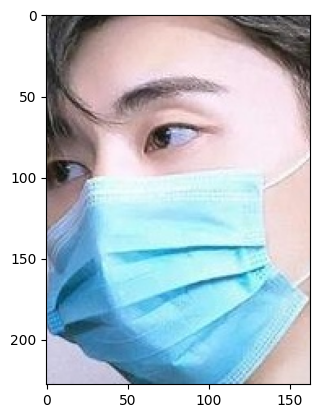

In [9]:
# displaying with mask image
img = mpimg.imread('data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

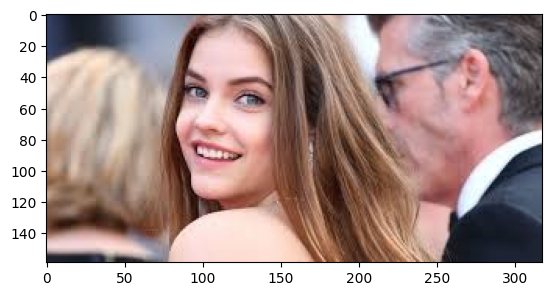

In [10]:
# displaying with maskout image
img = mpimg.imread('data/without_mask/without_mask_3093.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

In [11]:
# convert images to numpy arrays+

with_mask_path = 'data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = 'data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [12]:
type(data)
len(data)

7553

array([[[170, 173, 180],
        [156, 159, 166],
        [156, 159, 166],
        ...,
        [172, 175, 182],
        [173, 176, 183],
        [173, 172, 180]],

       [[170, 173, 180],
        [125, 128, 135],
        [127, 130, 137],
        ...,
        [163, 167, 173],
        [157, 159, 167],
        [155, 155, 161]],

       [[167, 170, 177],
        [143, 146, 153],
        [115, 118, 125],
        ...,
        [152, 155, 162],
        [151, 154, 161],
        [176, 179, 185]],

       ...,

       [[105, 111, 125],
        [103, 109, 123],
        [ 85,  91, 105],
        ...,
        [163, 164, 169],
        [170, 172, 177],
        [169, 170, 175]],

       [[ 96, 102, 116],
        [ 99, 105, 118],
        [100, 106, 120],
        ...,
        [139, 140, 145],
        [147, 148, 153],
        [140, 141, 146]],

       [[ 94, 100, 115],
        [ 81,  88, 103],
        [ 91,  98, 112],
        ...,
        [117, 118, 123],
        [115, 116, 121],
        [133, 134, 139]]], dtype=uint8)
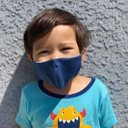

In [13]:
data[0]

In [14]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [15]:
# Splitting training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [17]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [18]:
X_train[0]
X_train_scaled[0]

array([[[0.28627451, 0.21176471, 0.19607843],
        [0.2745098 , 0.20392157, 0.19215686],
        [0.27058824, 0.19607843, 0.19215686],
        ...,
        [0.25490196, 0.21176471, 0.19607843],
        [0.24705882, 0.20392157, 0.18823529],
        [0.24313725, 0.2       , 0.17647059]],

       [[0.26666667, 0.19607843, 0.18823529],
        [0.25882353, 0.19607843, 0.18823529],
        [0.25490196, 0.19215686, 0.18039216],
        ...,
        [0.25098039, 0.20784314, 0.18431373],
        [0.24313725, 0.2       , 0.17647059],
        [0.24313725, 0.2       , 0.17647059]],

       [[0.24705882, 0.19215686, 0.18431373],
        [0.24313725, 0.19215686, 0.18039216],
        [0.23529412, 0.18823529, 0.17254902],
        ...,
        [0.24705882, 0.20392157, 0.18039216],
        [0.23529412, 0.19215686, 0.17254902],
        [0.23529412, 0.19607843, 0.16862745]],

       ...,

       [[0.22352941, 0.18431373, 0.17647059],
        [0.23529412, 0.18823529, 0.17647059],
        [0.24705882, 0

model building using CNN

In [19]:
import tensorflow as tf
from tensorflow import keras

num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [20]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [21]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 142s 830ms/step - loss: 0.4342 - acc: 0.8188 - val_loss: 0.3372 - val_acc: 0.8479
Epoch 2/5
170/170 [==============================] - 132s 776ms/step - loss: 0.2856 - acc: 0.8847 - val_loss: 0.2551 - val_acc: 0.8793
Epoch 3/5
170/170 [==============================] - 134s 790ms/step - loss: 0.2454 - acc: 0.9036 - val_loss: 0.2681 - val_acc: 0.8826
Epoch 4/5
170/170 [==============================] - 130s 768ms/step - loss: 0.1847 - acc: 0.9308 - val_loss: 0.2284 - val_acc: 0.8959
Epoch 5/5
170/170 [==============================] - 133s 782ms/step - loss: 0.1486 - acc: 0.9426 - val_loss: 0.2451 - val_acc: 0.9140


In [22]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 10s 211ms/step - loss: 0.1924 - acc: 0.9292
Test Accuracy = 0.9291859865188599


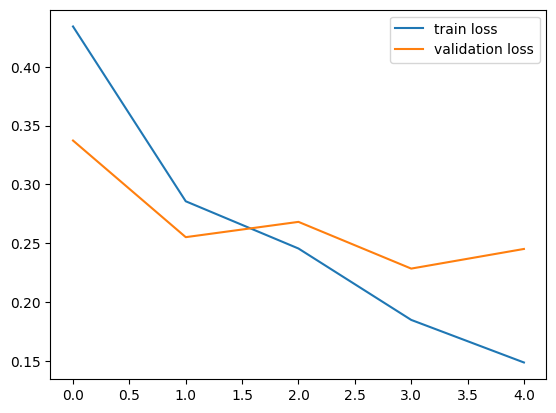

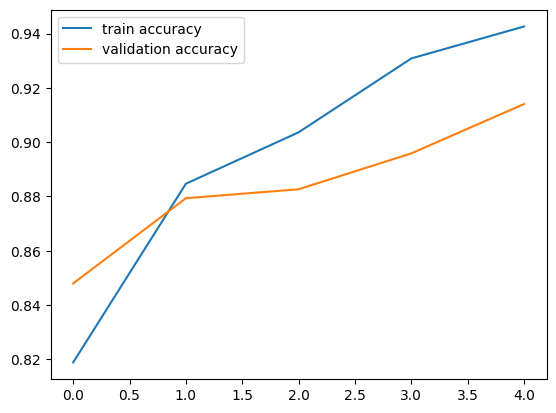

In [23]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: data/without_mask/without_mask_2925.jpg


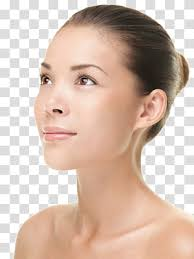

1/1 [==============================] - 0s 31ms/step
[[0.40206903 0.62550294]]
0.0
The person in the image is not wearing a mask


In [31]:
from google.colab.patches import cv2_imshow
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.round(input_prediction[0][0])

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: data/with_mask/with_mask_1545.jpg


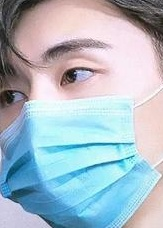

1/1 [==============================] - 0s 32ms/step
[[0.7620348  0.26987034]]
1.0
The person in the image is wearing a mask


In [30]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.round(input_prediction[0][0])

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')